# ДЗ №5 Сегментация
Реализация сети для сегметации объектов.

__Задача__ сделать работоспособную сеть для сегментирования изображений авто на основе предложенного шаблона


![Segmentation](../img/Segment04.png)

### Что делаем
Реализуем сверточную сеть для семантической сегментации, downsample->upsample -> Классификация каждого пикселя выходного изображения: 0 - не авто, 1 - авто. Выход картинка с x каналами, для классификации.
1. В файле model.py   - имплементировать модель вместо заглушки
2. В файле train.py - поставить правильный loss

### Данные
[Carvana](https://cloud.mail.ru/public/3tdq/AvtaHkDAb)

### Зависимости
 - tensorflow  - поддержка tensorboard
 - tensorboardx - тензор боард для pytorch
 - tqdm         - пакет для отрисовки прогресс баров

### Запуск пакета
_ По умолчанию все данные лежат в папке ./data/. Если вы положили их в другую папку, то поправте в скрипте train.py пути _
<br/>
Запускаем обучение сети
python train.py

Результаты обучение можно наблюдать в tensorboard

Запуск tensorboard --log ./od_log

## Результаты
1. Код model.py, train.py
2. Модель state_dicts()

### Тут нужно сделать загрузку состояния вашей модели, код модели в ноутбук тащить не нужно, достаточно сделать import model


In [1]:
import train as t
from model import SegmenterModel
import random

import torch

import matplotlib.pyplot as plt
%matplotlib inline

from carvana_dataset import CarvanaDataset

import warnings
warnings.filterwarnings('ignore')

In [2]:
DEVICE_ID = 3
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

torch.cuda.current_device()
torch.cuda.get_device_name(DEVICE_ID)

'GeForce GTX 1080 Ti'

### Тут нужно нарисовать картинки, с результатими сегментации из тестового сета

In [8]:
model = SegmenterModel()
t.train(model, n_epoch=10)
torch.save(model.state_dict(), "my_SegmenterModel")

  0%|          | 0/916 [00:00<?, ?it/s]

Current epoch:  0


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.03446431177379523
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.03370761971070072
Current epoch:  1


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.017510918438369532
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.01530847270921694
Current epoch:  2


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.014776040454228373
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.01333997666278458
Current epoch:  3


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.012813484067642272
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.013343406899824856
Current epoch:  4


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.013230384190823053
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.011777019208869127
Current epoch:  5


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.011388488255408653
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.010689613644004338
Current epoch:  6


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.010006899319947027
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.009006573825957268
Current epoch:  7


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.008628687459780269
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.00908050675121114
Current epoch:  8


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.007955233628280038
Make test


  0%|          | 0/916 [00:00<?, ?it/s]

Test loss 0.0070602699644922275
Current epoch:  9


  0%|          | 0/102 [00:00<?, ?it/s]

Epoch loss 0.007554794429073427
Make test


100%|██████████| 102/102 [00:10<00:00,  9.79it/s]


Test loss 0.00948470020593386


In [9]:
 def get_prediction(model, data):
    pred = model.forward(data.unsqueeze(0).cuda()) > 0 
    pred = pred.squeeze(0).squeeze(0).float().cuda()
    return pred

In [10]:
test = CarvanaDataset('data/test/', 'data/test_masks/')

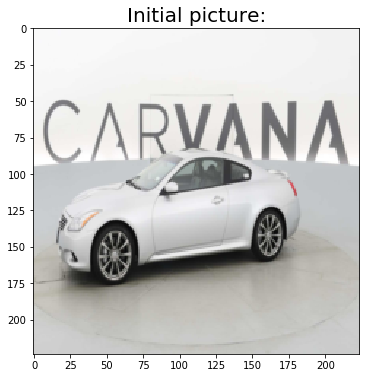

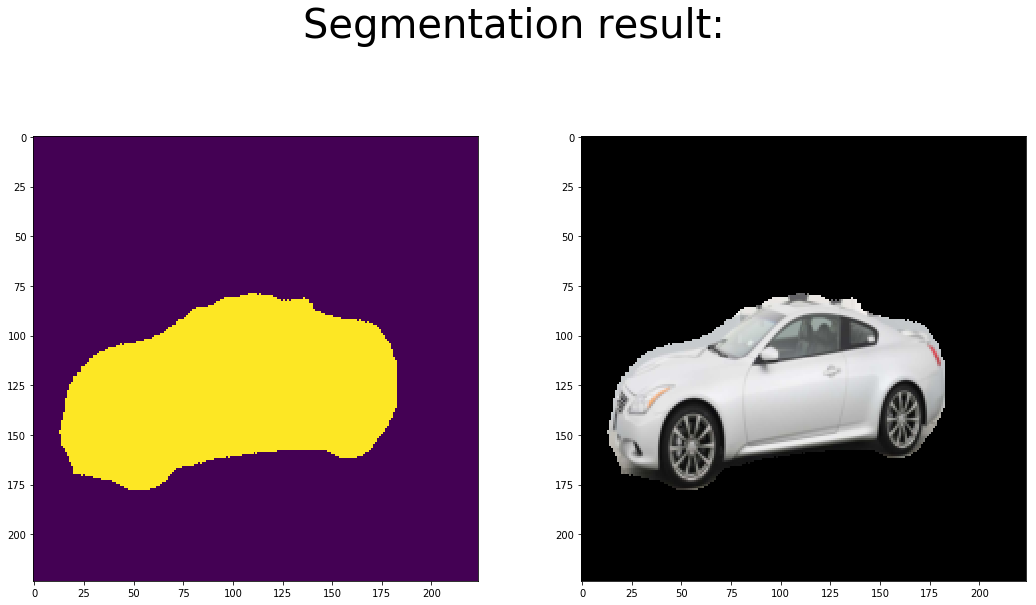

In [11]:
img_ind = random.randint(0, len(test))
img = test[img_ind][0].cuda().cpu()
plt.figure(figsize=(6, 6))
plt.title("Initial picture:", fontsize=20)
plt.imshow(img.permute(1, 2, 0))


seg_result = get_prediction(model, img).cpu()
detected_car = img *seg_result

plt.figure(figsize=(18, 18))
plt.suptitle("Segmentation result:", fontsize=40)
plt.subplot(2, 2, 1)
plt.imshow(seg_result)
plt.subplot(2, 2, 2)
plt.imshow((detected_car).permute(1, 2, 0))